In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib notebook

In [2]:
n = 100
cov_nercome = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [3]:
print(cov_nercome)
print(cov_sample)

[[ 2.32189896e+08  9.34184485e+06 -1.85025863e+06 ... -8.23879651e+03
   6.55090361e+04  1.61137836e+05]
 [ 9.34184485e+06  6.52494277e+07  6.68631205e+06 ... -9.23047906e+04
  -3.90637448e+04  3.22842945e+04]
 [-1.85025863e+06  6.68631205e+06  1.67496414e+07 ... -1.71812855e+04
   2.03387483e+04  3.23315820e+04]
 ...
 [-8.23879651e+03 -9.23047906e+04 -1.71812855e+04 ...  2.59858805e+04
   5.45635117e+03  1.25668329e+03]
 [ 6.55090361e+04 -3.90637448e+04  2.03387483e+04 ...  5.45635117e+03
   2.68401630e+04  2.55254014e+03]
 [ 1.61137836e+05  3.22842945e+04  3.23315820e+04 ...  1.25668329e+03
   2.55254014e+03  2.26464413e+04]]
[[ 2.21016226e+08  8.47947131e+06 -2.10148555e+06 ... -7.48891593e+03
   5.51266146e+04  1.62592799e+05]
 [ 8.47947131e+06  5.49968875e+07  5.88080086e+06 ... -7.79854730e+04
  -3.41543961e+04  2.72485501e+04]
 [-2.10148555e+06  5.88080086e+06  1.28993383e+07 ... -9.03331455e+03
   1.53803105e+04  2.22439106e+04]
 ...
 [-7.48891593e+03 -7.79854730e+04 -9.0333145

In [4]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [5]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [6]:
MSE_NERCOME = np.trace((cov_nercome-cov_real)@(cov_nercome-cov_real).T)
MSE_sample = np.trace((cov_sample-cov_real)@(cov_sample-cov_real).T)
print(f"MSE NERCOME: {MSE_NERCOME}")
print(f"MSE sample: {MSE_sample}")

MSE NERCOME: 6.6021403644583704e+16
MSE sample: 7.059371417230011e+16


In [7]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

<IPython.core.display.Javascript object>


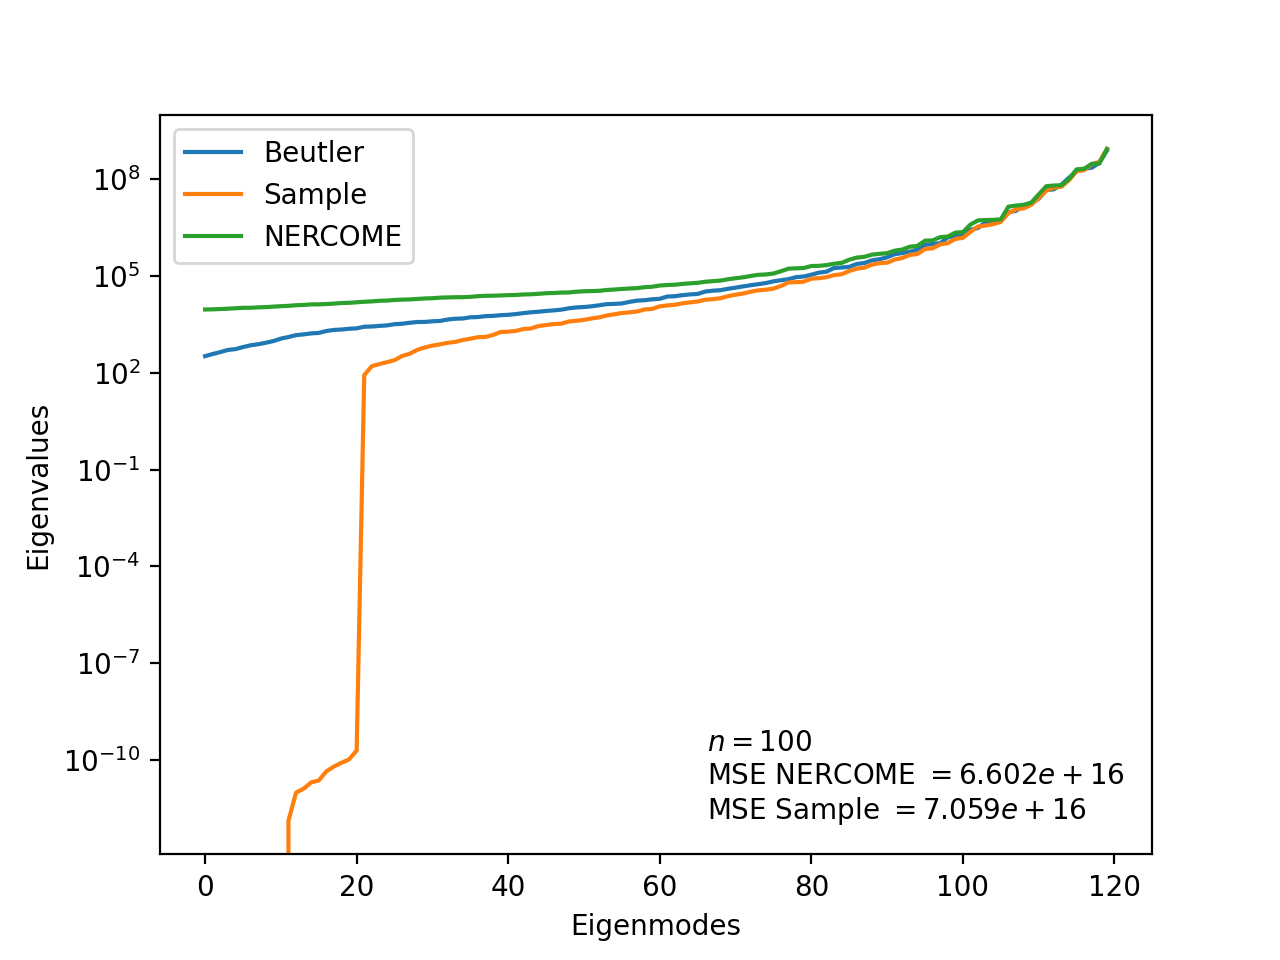

In [8]:
#plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

#plt.xlim(100, 120)
#plt.ylim(1e6,1e9)

parameters = AnchoredText(
    fr"$n = {n}$" "\n"
    fr"MSE NERCOME $= {np.format_float_scientific(MSE_NERCOME, precision=3)}$" "\n"
    fr"MSE Sample $={np.format_float_scientific(MSE_sample, precision=3)}$",
    frameon=False, loc="lower right", pad=0.5)
plt.setp(parameters.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(parameters)

In [9]:
plt.savefig("./trial", format="pdf")

In [10]:
nercome_rel_errors = (cov_nercome-cov_real)/np.abs(cov_real)
print(nercome_rel_errors)

[[-3.06514537e-02 -5.11030178e-01 -1.38455715e+01 ... -1.85104152e+00
   6.38352448e+00  6.27261616e+00]
 [-5.11030178e-01  2.66347947e-01  3.97708157e-01 ... -1.11033247e+01
  -5.21712655e+00  3.27932439e+00]
 [-1.38455715e+01  3.97708157e-01 -1.64839573e-03 ... -3.02883205e+01
   9.91265369e+00  3.77731267e+00]
 ...
 [-1.85104152e+00 -1.11033247e+01 -3.02883205e+01 ...  5.14352604e+00
   3.23196620e+00  2.32069201e+00]
 [ 6.38352448e+00 -5.21712655e+00  9.91265369e+00 ...  3.23196620e+00
   5.90526492e+00  1.54437393e+00]
 [ 6.27261616e+00  3.27932439e+00  3.77731267e+00 ...  2.32069201e+00
   1.54437393e+00  5.23895175e+00]]


In [11]:
nercome_pos_count = 0
nercome_neg_count = 0
for row in nercome_rel_errors:
    for error in row:
        if error >= 0:
            nercome_pos_count += 1
        elif error < 0:
            nercome_neg_count += 1

print(f"NERCOME overestimated {nercome_pos_count} elements")
print(f"NERCOME underestimated {nercome_neg_count} elements")

index_max_nercome = np.unravel_index(np.abs(nercome_rel_errors).argmax(), nercome_rel_errors.shape)

print(f"Maximum relative error is {nercome_rel_errors[index_max_nercome]}")
print(f"Maximum relative error index is {index_max_nercome}")
print(f"NERCOME: {cov_nercome[index_max_nercome]}, real: {cov_real[index_max_nercome]}")

NERCOME overestimated 7829 elements
NERCOME underestimated 6571 elements
Maximum relative error is -39632.38166706117
Maximum relative error index is (80, 94)
NERCOME: -527737.5727229066, real: -13.315481811674502


In [12]:
sample_rel_errors = (cov_sample-cov_real)/np.abs(cov_real)
print(sample_rel_errors)

[[-7.72993958e-02 -5.56168440e-01 -1.55897349e+01 ... -1.77358124e+00
   5.53029837e+00  6.33828284e+00]
 [-5.56168440e-01  6.73686817e-02  2.29323918e-01 ... -9.53598768e+00
  -4.68713781e+00  2.92379253e+00]
 [-1.55897349e+01  2.29323918e-01 -2.31143235e-01 ... -1.54502965e+01
   7.73981402e+00  2.28675893e+00]
 ...
 [-1.77358124e+00 -9.53598768e+00 -1.54502965e+01 ... -5.63977188e-03
   4.75086044e-01  5.25881017e-01]
 [ 5.53029837e+00 -4.68713781e+00  7.73981402e+00 ...  4.75086044e-01
   1.14171986e-01  1.28981890e-01]
 [ 6.33828284e+00  2.92379253e+00  2.28675893e+00 ...  5.25881017e-01
   1.28981890e-01 -1.39148737e-01]]


In [13]:
sample_pos_count = 0
sample_neg_count = 0
for row in sample_rel_errors:
    for error in row:
        if error >= 0:
            sample_pos_count += 1
        elif error < 0:
            sample_neg_count += 1

print(f"Sample overestimated {sample_pos_count} elements")
print(f"Sample underestimated {sample_neg_count} elements")

index_max_sample = np.unravel_index(np.abs(sample_rel_errors).argmax(), sample_rel_errors.shape)

print(f"Maximum relative error is {sample_rel_errors[index_max_sample]}")
print(f"Maximum relative error index is {index_max_sample}")
print(f"Sample: {cov_sample[index_max_sample]}, real: {cov_real[index_max_sample]}")

Sample overestimated 7048 elements
Sample underestimated 7352 elements
Maximum relative error is -38314.050824111
Maximum relative error index is (94, 80)
Sample: -510183.3623618341, real: -13.315481811674502
